In [4]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")

In [6]:
df.head(10)

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376
5,36.790676,-18.019236
6,81.035830,-7.614212
7,-30.387047,63.771860
8,-15.396520,-2.979053
9,-46.218590,11.978482


In [7]:
# chech the number of the data (matrix)
df.shape

(4406, 2)

### Elbow Method

In [8]:
# elbow method
distrotions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distrotions.append(kmeanModel.inertia_)

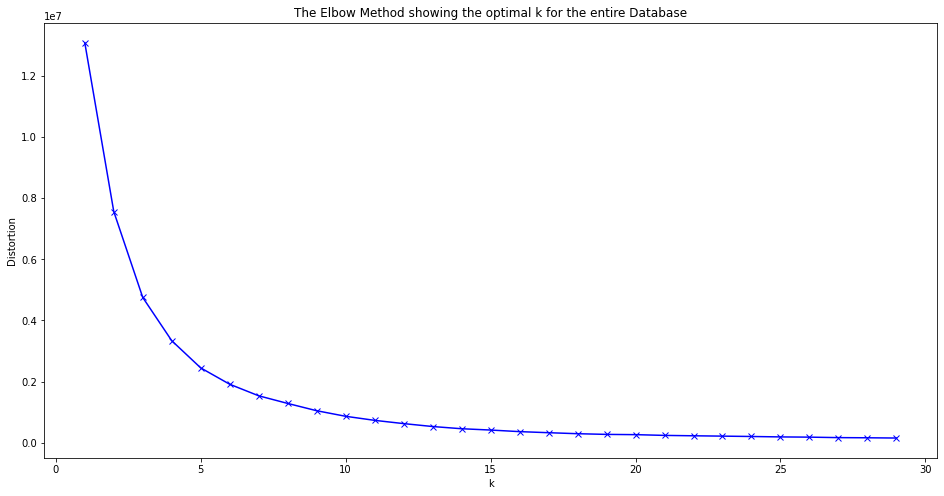

In [12]:
# plot the data
plt.figure(figsize=(16, 8))
plt.plot(K, distrotions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for the entire Database')
plt.show()

In [16]:
kmeans_model = KMeans(n_clusters = 5)
clusters_kmeans = kmeans_model.fit_predict(df)

In [17]:
clusters_kmeans

array([2, 2, 4, ..., 3, 4, 3])

### Hierarchical Clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# perform hierarchical clustering
hc = linkage(df, method = 'ward')

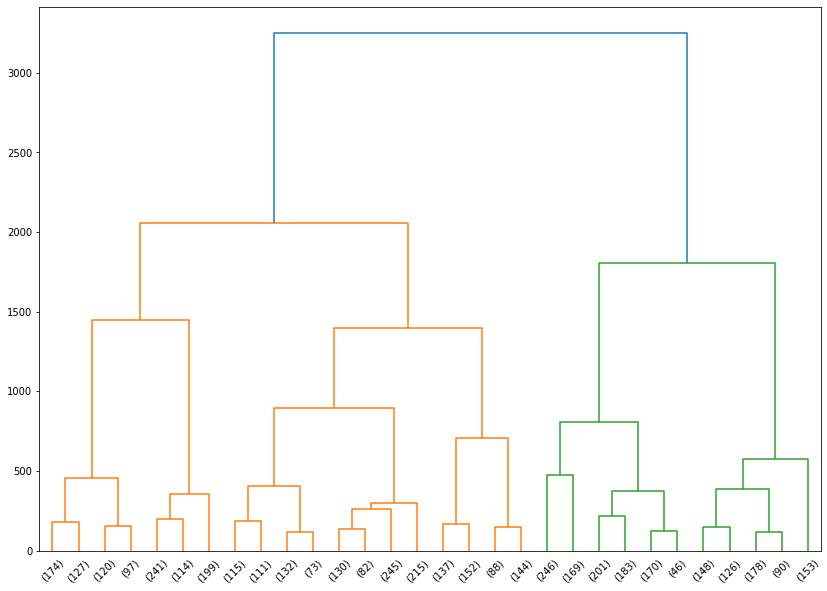

In [20]:
plt.figure(figsize = (14, 10))

# create dendrogram
dendrogram(hc, truncate_mode='lastp', orientation='top', distance_sort='descending')

# display plot
plt.show()

In [21]:
# set the max depth
max_depth = 250

#redo the clustering
cluseters_hc = fcluster(hc, max_depth, criterion='distance')

In [22]:
# see how many clustering will be at 250
len(set(cluseters_hc))

18

### DBSCAN
the minPts be 4 for two-dimensional dateste.

In [23]:
# library pentru determinare de parametri
from sklearn.neighbors import NearestNeighbors

# n_neighbors = 5 as kneighbors fucntion return distance of points to itself
nbrs = NearestNeighbors(n_neighbors=5).fit(df)

# find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)

# sort the neoghbor distance
# axis = 0 represents sort alog first axis
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

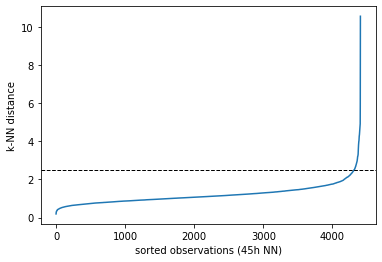

In [43]:
k_dist = sort_neigh_dist[:, 4]

plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel('k-NN distance')
plt.xlabel("sorted observations (45h NN)")
plt.show()

In [32]:
# library segmentarea propriozisa
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 2.5, min_samples = 4).fit(df)

# get cluster labels
clusters_dbscan = clusters.labels_

In [34]:
# check unique clusters
set(clusters.labels_)
# -1 = is outlayer

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [35]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 834,
         1: 1501,
         2: 703,
         3: 285,
         4: 145,
         5: 245,
         6: 232,
         7: 283,
         8: 11,
         9: 11,
         -1: 34,
         10: 5,
         11: 13,
         12: 46,
         22: 4,
         13: 6,
         14: 10,
         15: 8,
         16: 4,
         17: 8,
         18: 5,
         19: 5,
         20: 4,
         21: 4})

NameError: name 'bbox_to_anchor' is not defined

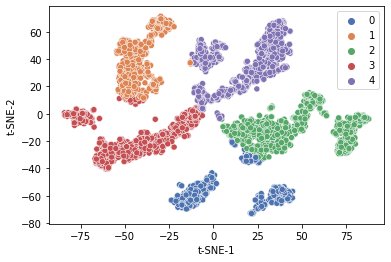

In [42]:
from matplotlib import pyplot as plt

p = sns.scatterplot(data = df, x = 't-SNE-1', y="t-SNE-2", hue=clusters_kmeans, legend='full', palette='deep')
sns.move_legend(p, 'upper right', bbox_to_anchor(1,17, 1.2), title='Clusters by k-Means')
plt.show()

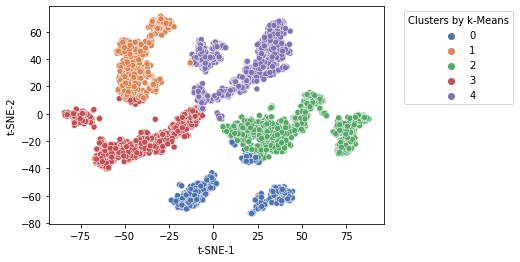

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt

p = sns.scatterplot(data=df, x='t-SNE-1', y='t-SNE-2', hue=clusters_kmeans, legend='full', palette='deep')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), title='Clusters by k-Means')
plt.show()

NameError: name 'bbox_to_anchor' is not defined

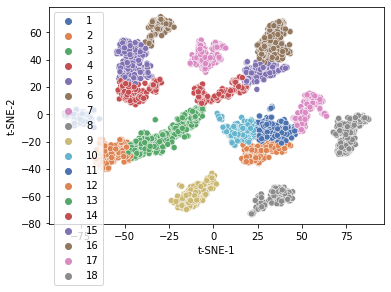

In [48]:
from matplotlib import pyplot as plt

p = sns.scatterplot(data = df, x = 't-SNE-1', y="t-SNE-2", hue=cluseters_hc, legend='full', palette='deep')
sns.move_legend(p, 'upper right', bbox_to_anchor(1,17, 1.2), title='Clusters by Hierarchical')
plt.show()

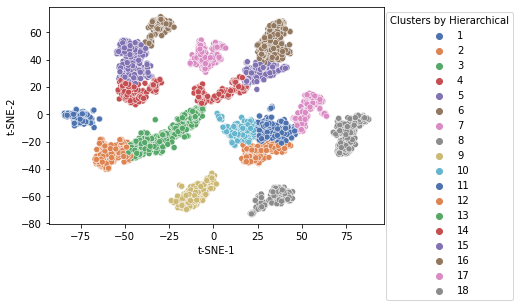

In [80]:
import seaborn as sns
from matplotlib import pyplot as plt

p = sns.scatterplot(data=df, x='t-SNE-1', y='t-SNE-2', hue=cluseters_hc, legend='full', palette='deep')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), title='Clusters by Hierarchical')
plt.show()


NameError: name 'bbox_to_anchor' is not defined

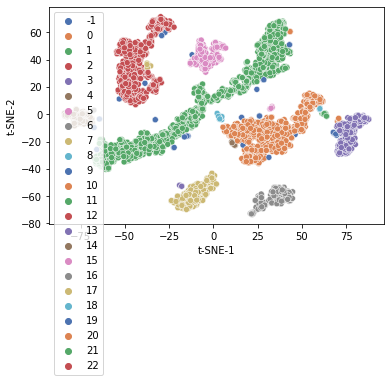

In [49]:
from matplotlib import pyplot as plt

p = sns.scatterplot(data = df, x = 't-SNE-1', y="t-SNE-2", hue=clusters_dbscan, legend='full', palette='deep')
sns.move_legend(p, 'upper right', bbox_to_anchor(1,17, 1.2), title='Clusters by DBSCAN')
plt.show()

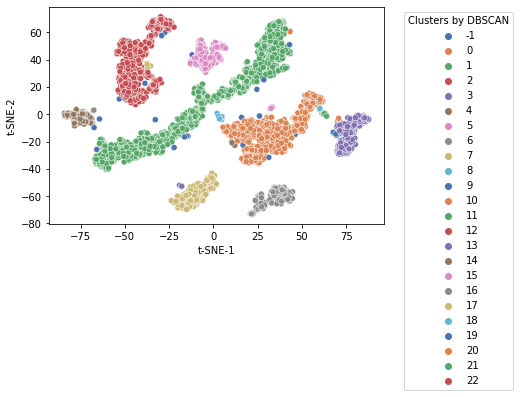

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

p = sns.scatterplot(data=df, x='t-SNE-1', y='t-SNE-2',hue=clusters_dbscan, legend='full', palette='deep')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), title='Clusters by DBSCAN')
plt.show()


### Silhoutte score

In [51]:
from sklearn.metrics import silhouette_score

### Gausian

In [52]:
from sklearn.mixture import GaussianMixture

In [57]:
X = df.to_numpy()

In [58]:
distrotions = []

K = range(2, 30)

for k in K:
    gnm = GaussianMixture(
        n_components=k, covariance_type='full', random_state=42
    )
    gnm.fit(X)
    
    cluster_labels = gnm.predict(X)
    
#   silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_cluster = {0}, the silhouette score is {1}'.format(k, silhouette_avg))
    
# the 23 clusters

For n_cluster = 2, the silhouette score is 0.3575676984539823
For n_cluster = 3, the silhouette score is 0.34526620636864397
For n_cluster = 4, the silhouette score is 0.40677418963372936
For n_cluster = 5, the silhouette score is 0.47181514201286195
For n_cluster = 6, the silhouette score is 0.4717638600679408
For n_cluster = 7, the silhouette score is 0.44599640952527325
For n_cluster = 8, the silhouette score is 0.49916261880713875
For n_cluster = 9, the silhouette score is 0.49067551730758
For n_cluster = 10, the silhouette score is 0.519391264849795
For n_cluster = 11, the silhouette score is 0.49923996593845665
For n_cluster = 12, the silhouette score is 0.5171760754504782
For n_cluster = 13, the silhouette score is 0.5428191347546015
For n_cluster = 14, the silhouette score is 0.5364491425191701
For n_cluster = 15, the silhouette score is 0.5219005927594877
For n_cluster = 16, the silhouette score is 0.5124711340483636
For n_cluster = 17, the silhouette score is 0.50194480455672

In [59]:
gnm = GaussianMixture(n_components=23, covariance_type='full')

In [61]:
gnm.fit(X)

GaussianMixture(n_components=23)

In [62]:
cluseters_em = gnm.predict(X)

NameError: name 'bbox_to_anchor' is not defined

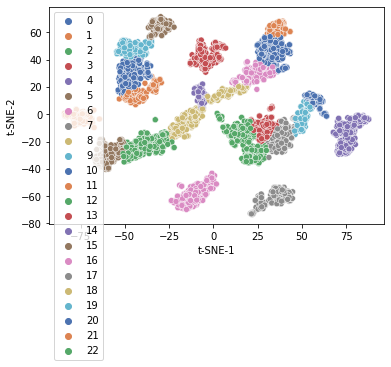

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

p = sns.scatterplot(data = df, x = 't-SNE-1', y="t-SNE-2", hue=cluseters_em, legend='full', palette='deep')
sns.move_legend(p, 'upper right', bbox_to_anchor(1,2, 1.0), title='Clusters by DBSCAN')
plt.show()

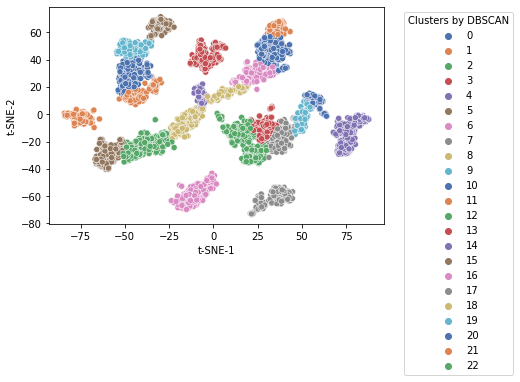

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt

p = sns.scatterplot(data=df, x='t-SNE-1', y='t-SNE-2', hue=cluseters_em, legend='full', palette='deep')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), title='Clusters by DBSCAN')
plt.show()


In [72]:
max_clusters = 23
range_n_clusters = range(2, max_clusters)

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, random_state= 42)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg))
# the best 15 clusters

For n_clusters=2, the silhouette score is 0.3919378663716124
For n_clusters=3, the silhouette score is 0.42114609415352633
For n_clusters=4, the silhouette score is 0.44651523908279983
For n_clusters=5, the silhouette score is 0.46267228491152046
For n_clusters=6, the silhouette score is 0.4724359115028368
For n_clusters=7, the silhouette score is 0.4941826985787323
For n_clusters=8, the silhouette score is 0.5268751540354353
For n_clusters=9, the silhouette score is 0.5319141023490224
For n_clusters=10, the silhouette score is 0.522403790196004
For n_clusters=11, the silhouette score is 0.53473365005953
For n_clusters=12, the silhouette score is 0.5520022892003539
For n_clusters=13, the silhouette score is 0.5540790134636734
For n_clusters=14, the silhouette score is 0.5507645270458419
For n_clusters=15, the silhouette score is 0.5581816291451865
For n_clusters=16, the silhouette score is 0.5437730877446074
For n_clusters=17, the silhouette score is 0.542395684636947
For n_clusters=18

In [75]:
deep_range = [2500, 1900, 1500, 1300, 900, 800, 700, 500, 400, 300, 250, 230, 220, 200, 180, 160, 150, 125, 100, 50]

for deep in deep_range:
    cluster_labels = fcluster(hc, deep, criterion='distance')
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print('for deep {0}, clusters - {1}, the silhouette score is {2}'.format(deep, len(set(cluster_labels)), silhouette_avg))
# the best cluset 16

for deep 2500, clusters - 2, the silhouette score is 0.3707869404162496
for deep 1900, clusters - 3, the silhouette score is 0.34138136957010484
for deep 1500, clusters - 4, the silhouette score is 0.3743354182365549
for deep 1300, clusters - 6, the silhouette score is 0.4614882077515436
for deep 900, clusters - 6, the silhouette score is 0.4614882077515436
for deep 800, clusters - 8, the silhouette score is 0.49640293767262345
for deep 700, clusters - 9, the silhouette score is 0.5268596204030698
for deep 500, clusters - 10, the silhouette score is 0.5379379086089288
for deep 400, clusters - 13, the silhouette score is 0.5300972969705856
for deep 300, clusters - 16, the silhouette score is 0.5339349738034102
for deep 250, clusters - 18, the silhouette score is 0.5285083266033881
for deep 230, clusters - 18, the silhouette score is 0.5285083266033881
for deep 220, clusters - 18, the silhouette score is 0.5285083266033881
for deep 200, clusters - 20, the silhouette score is 0.5256539061